In [2]:
import os

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
magvega = np.array([16.6, 15.6, 11.3, 8.0])
dm = np.array([2.699, 3.339, 5.174, 6.620])

In [5]:
fluxvega = 10**(22.5-magvega)
fluxab = fluxvega*10**(-dm/2.5)
magab = 22.5-np.log10(fluxab)

In [6]:
LSLGAdir = os.getenv('LSLGA_DIR')
galaxies = os.path.join(LSLGAdir, 'maglims.csv')

In [7]:
df = pd.read_csv(galaxies)
df

,wavelength,mag,survey,band
0,34000,17.7,WISE,W1
1,46000,16.9,WISE,W2
2,120000,13.4,WISE,W3
3,220000,10.6,WISE,W4
4,34000,18.2,UNWISE,W1
5,46000,17.4,UNWISE,W2
6,120000,13.4,UNWISE,W3
7,220000,10.6,UNWISE,W4
8,4640,23.1,SDSS,g
9,6580,22.7,SDSS,r


In [8]:
area = np.pi*(2.5)**2
mulim = df.mag-2.5*np.log10(area)
df['mulim'] = mulim

In [9]:
wise = df[df.survey == 'WISE']
unwise = df[df.survey == 'UNWISE']
sdss = df[df.survey == 'SDSS']
des = df[df.survey == 'DES']
ls = df[df.survey == 'LS']
twomass = df[df.survey == '2MASS']
galexa = df[df.survey == 'GALEXAIS']
galexm = df[df.survey == 'GALEXMIS']
galexd = df[df.survey == 'GALEXDIS']

In [45]:
df

,wavelength,mag,survey,band,mulim
0,34000,17.7,WISE,W1,14.467425
1,46000,16.9,WISE,W2,13.667425
2,120000,13.4,WISE,W3,10.167425
3,220000,10.6,WISE,W4,7.367425
4,34000,18.2,UNWISE,W1,14.967425
5,46000,17.4,UNWISE,W2,14.167425
6,120000,13.4,UNWISE,W3,10.167425
7,220000,10.6,UNWISE,W4,7.367425
8,4640,23.1,SDSS,g,19.867425
9,6580,22.7,SDSS,r,19.467425


Text(0,0.5,'$\\mu_{lim} (mag/arcsec^2)$')

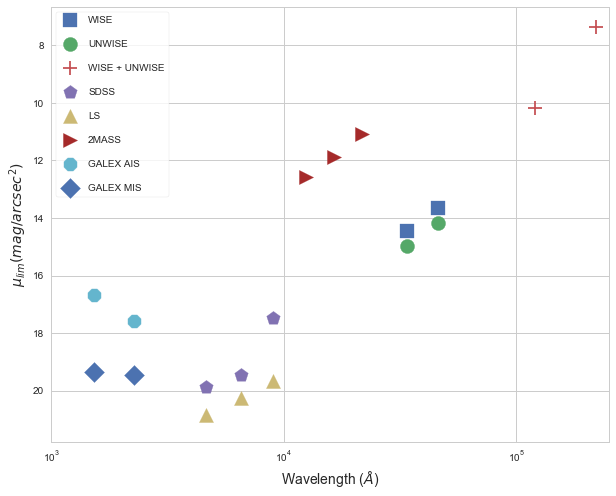

In [52]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))

plt.scatter(wise.wavelength[:2], wise.mulim[:2], s=200, label='WISE', marker='s')
plt.scatter(unwise.wavelength[:2], unwise.mulim[:2], s=200, label='UNWISE', marker='o')
plt.scatter(unwise.wavelength[2:], unwise.mulim[2:], s=200, label='WISE + UNWISE', marker='+')

plt.scatter(sdss.wavelength, sdss.mulim, s=200, label='SDSS', marker='p')
#plt.scatter(des.wavelength, des.mulim, s=100, label='DES')
plt.scatter(ls.wavelength, ls.mulim, s=200, label='LS', marker='^')
plt.scatter(twomass.wavelength, twomass.mulim, s=200, label='2MASS', color='brown', marker='>')

plt.scatter(galexa.wavelength, galexa.mulim, s=200, label='GALEX AIS', marker='8')
plt.scatter(galexm.wavelength, galexm.mulim, s=200, label='GALEX MIS', marker='D')


#plt.scatter(galexd.wavelength, galexd.mulim, s=100, label='GALEX DIS', marker='s')
plt.legend(frameon=True, labelspacing=1.5)
plt.xscale('log')
plt.xlim([1000, 250000])
plt.gca().invert_yaxis()
plt.xlabel(r'Wavelength ($\AA$)', size=14)
plt.ylabel(r'$\mu_{lim} (mag/arcsec^2)$', size=14)

Text(33.8544,0.5,'$\\mu_{lim} (mag/arcsec^2)$')

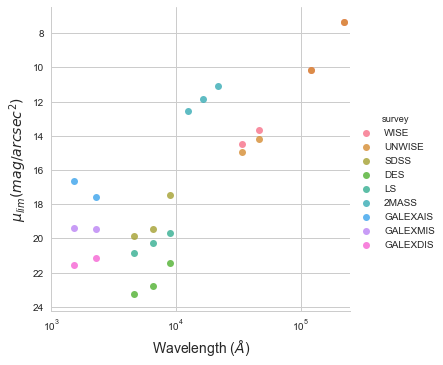

In [38]:
sns.lmplot(x='wavelength', y='mulim', data=df,
           fit_reg=False, # No regression line
           hue='survey') 
plt.xscale('log')
plt.xlim([1000, 250000])
plt.gca().invert_yaxis()
plt.xlabel(r'Wavelength ($\AA$)', size=14)
plt.ylabel(r'$\mu_{lim} (mag/arcsec^2)$', size=14)